### Financial Planning

In [240]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [241]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [242]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [243]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD.json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [244]:
# Fetch current BTC price
btc_response = requests.get(btc_url)

# Fetch current ETH price
eth_response = requests.get(eth_url)

#Output data from the url
response_btc = btc_response.content
response_eth = eth_response.content

# Converting the byte data from the url to dictionary
res_btc = json.loads(response_btc.decode('utf-8')) 
res_eth = json.loads(response_eth.decode('utf-8')) 

# Pulling the price data out 
current_btc_price = res_btc['data']['1']['quotes']['USD']['price']
current_eth_price = res_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

# Printing the data out and the data type
print(res_eth)
type(res_btc)

The current value of your 1.2 BTC is $42260.40
The current value of your 5.3 ETH is $5910.72
{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 114136197, 'total_supply': 114136197, 'max_supply': 0, 'quotes': {'USD': {'price': 1115.23, 'volume_24h': 40178735070, 'market_cap': 127288592779, 'percentage_change_1h': -0.275081475174356, 'percentage_change_24h': 12.1284276915714, 'percentage_change_7d': 51.6106608537388, 'percent_change_1h': -0.275081475174356, 'percent_change_24h': 12.1284276915714, 'percent_change_7d': 51.6106608537388}, 'CAD': {'price': 1413.330979, 'volume_24h': 50918510954.211, 'market_cap': 161312833628.827, 'percent_change_1h': -0.275081475174356, 'percent_change_24h': 12.1284276915714, 'percent_change_7d': 51.6106608537388}}, 'last_updated': 1609913872}}, 'metadata': {'timestamp': 1609913872, 'num_cryptocurrencies': 1389, 'error': None}}


dict

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [245]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [246]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
Alpaca = tradeapi.REST(
         alpaca_api_key,
         alpaca_secret_key,
         api_version = "v2")

In [247]:
type(alpaca_api_key)

str

In [248]:
# Format current date as ISO format
today = pd.Timestamp('2020-10-29',tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = Alpaca.get_barset(
            tickers,
            timeframe,
            start = today,
            end = today).df

df_closing_prices = pd.DataFrame()

df_closing_prices['AGG'] = df_ticker['AGG']['close']
df_closing_prices['SPY'] = df_ticker['SPY']['close']

# Preview DataFrame
df_closing_prices
#df_ticker

,AGG,SPY
time,,
2020-10-29 00:00:00-04:00,117.52,329.99


In [249]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker['AGG']['close'])
spy_close_price = float(df_ticker['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.52
Current SPY closing price: $329.99


In [250]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16499.50
The current value of your 200 AGG shares is $23504.00


### Savings Health Analysis

In [251]:
# Set monthly household income
monthly_income = 12000

crypto_amount = my_btc_value + my_eth_value
shares_amount = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame()
df_savings["Amount"] = [crypto_amount,shares_amount]
df_savings.index = (["crypto","shares"])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,48171.119
shares,40003.500


<AxesSubplot:title={'center':'Composition'}, ylabel='Amount'>

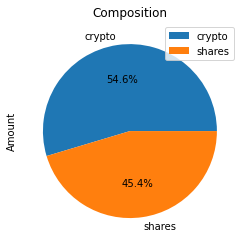

In [252]:
# Plot savings pie chart
df_savings.plot.pie(y = 'Amount', title='Composition',autopct='%1.1f%%')

In [253]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_amount + shares_amount

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations, you have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print(f"Congratulations, you have reached the emergency fund target amount")
else:
    print(f"You have ${emergency_fund - total_savings} to get to your emergency fund")

Congratulations, you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [254]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [255]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = Alpaca.get_barset(
            tickers,
            timeframe,
            start = start_date,
            end = end_date).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [256]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
df_shares_closing_prices = pd.DataFrame()

df_shares_closing_prices['AGG'] = df_stock_data['AGG']['close']
df_shares_closing_prices['SPY'] = df_stock_data['SPY']['close']

df_shares_closing_prices.index = df_shares_closing_prices.index.date

df_daily_returns = df_shares_closing_prices.pct_change().dropna()

df_daily_returns.head()

,AGG,SPY
2015-08-10,-0.001374,0.012745
2015-08-11,0.003301,-0.009260
2015-08-12,-0.000548,0.001246
2015-08-13,-0.001920,-0.001245
2015-08-14,-0.000550,0.003691


In [257]:
# Printing the simulation input data
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days =252*30)

MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [258]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993805,0.995406,1.016010,1.002941,0.989815,1.011598,0.992858,1.002851,1.000408,0.984987,...,0.994378,1.001442,0.990168,0.996025,1.002336,1.011509,1.005678,0.998660,1.011334,1.002702
2,0.999847,0.997375,1.018110,1.012460,0.982357,1.012380,1.001963,1.005925,1.009362,0.981563,...,0.990087,0.993584,0.995987,0.995775,0.998003,1.014061,1.007557,0.999898,1.012802,1.013796
3,1.007363,0.993969,1.026894,0.993193,0.983693,1.014796,1.000572,1.000344,1.017949,0.969795,...,0.987138,0.999714,0.990006,0.993999,1.006835,1.019808,1.011142,0.996788,1.015766,1.008703
4,1.008364,0.997035,1.040996,0.993895,0.975524,1.013940,0.984017,1.002488,1.024241,0.965948,...,0.995962,0.998207,0.992416,0.987224,1.006019,1.013697,1.005241,1.003430,1.007331,1.008466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.139210,6.544442,14.599825,4.032415,4.384692,17.455216,12.026143,13.659606,4.438802,4.960884,...,6.383954,19.869914,5.230705,10.120546,5.393618,6.557302,4.591476,11.093276,5.787065,9.569563
7557,3.160909,6.524598,14.602439,4.098066,4.390065,17.603129,12.101811,13.549781,4.518651,4.963616,...,6.405905,19.963164,5.251587,10.118262,5.380644,6.567940,4.639632,11.161142,5.765830,9.562492
7558,3.160731,6.519166,14.536503,4.075659,4.400254,17.623855,12.199792,13.470154,4.517913,4.920278,...,6.312266,20.231049,5.251948,10.234139,5.424350,6.551397,4.609989,11.184402,5.696784,9.588040
7559,3.136465,6.490261,14.678389,4.061087,4.389142,17.702550,12.244127,13.471451,4.499777,4.869364,...,6.288412,20.350227,5.228234,10.103737,5.492818,6.519018,4.565734,11.263295,5.642954,9.486142


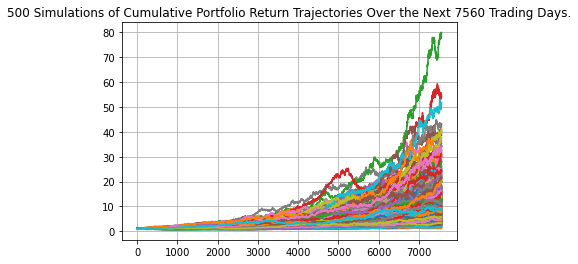

In [259]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

line_plot.grid()

line_plot.get_figure().savefig('MC_thirtyyear_sim_plot.png',bbox_inches='tight')

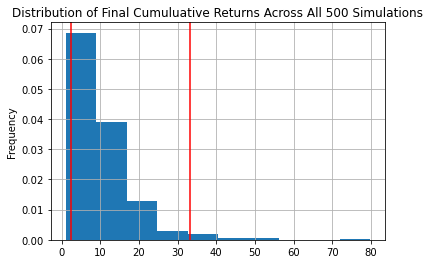

In [260]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()
dist_plot.grid()
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')


### Retirement Analysis

In [261]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(mc_summary)

count           500.000000
mean             10.626411
std               8.294275
min               1.080807
25%               5.400880
50%               8.442202
75%              12.987939
max              79.770670
95% CI Lower      2.491235
95% CI Upper     33.295065
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [262]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_summary[8]*initial_investment,2)
ci_upper = round(mc_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49824.7 and $665901.31


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [263]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_summary[8]*initial_investment,2)
ci_upper = round(mc_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $74737.05 and $998851.96


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [264]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days =252*5)

MC_fiveyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [265]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003194,1.001357,1.006157,0.984872,0.993246,1.001232,0.995752,1.003022,0.989210,0.997810,...,0.994499,1.001393,1.003057,0.983110,1.006627,0.995069,0.993972,0.983312,0.995764,0.997404
2,1.003980,1.012050,1.011211,0.987137,0.993239,0.990802,0.988297,0.999382,0.975061,1.009899,...,0.987463,0.998358,0.992287,0.980853,1.015681,0.986547,0.997945,0.978341,0.996293,1.002002
3,0.999135,1.022076,1.009879,0.990125,0.995384,0.993667,0.993288,1.001236,0.973060,1.023968,...,0.988800,1.006233,1.001498,0.971670,1.011309,0.967572,1.000997,0.987218,0.991920,1.006888
4,0.994178,1.034543,1.014003,0.997200,1.000558,0.997271,0.998265,1.022036,0.965954,1.028741,...,0.981599,0.991589,1.002805,0.966978,1.016025,0.960433,0.987297,0.995898,0.999410,1.005884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.986427,1.324018,1.326077,1.113010,1.326788,1.632117,1.439224,1.191059,1.562863,1.084109,...,1.380181,1.291904,1.613628,1.078162,2.058446,2.255050,1.345069,0.938329,1.677058,0.866666
1257,0.979411,1.330684,1.337932,1.130721,1.308620,1.628759,1.460252,1.205165,1.560627,1.085301,...,1.384270,1.295529,1.616661,1.091973,2.070125,2.255444,1.349548,0.939792,1.655608,0.863952
1258,0.983506,1.328590,1.354990,1.130894,1.296484,1.637297,1.466736,1.208650,1.580694,1.077817,...,1.382074,1.295377,1.601191,1.090729,2.085511,2.255590,1.360817,0.939436,1.660705,0.877113
1259,0.976942,1.344716,1.356603,1.131508,1.302215,1.634996,1.479879,1.204311,1.570091,1.079300,...,1.372619,1.301590,1.596278,1.084831,2.081130,2.269031,1.362369,0.941397,1.659338,0.862973


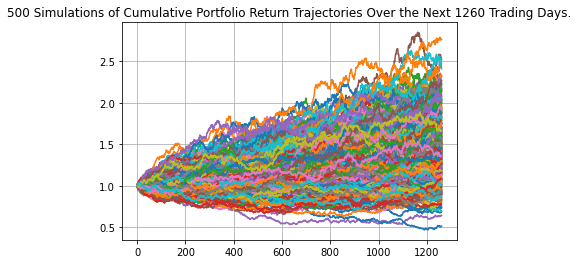

In [266]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

line_plot.grid()

line_plot.get_figure().savefig('MC_fiveyear_sim_plot.png',bbox_inches='tight')

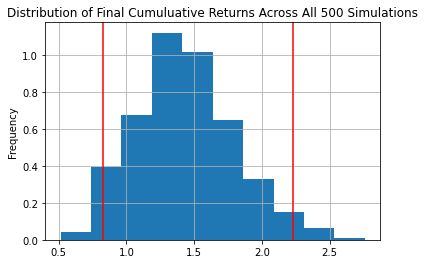

In [267]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()
dist_plot.grid()
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [268]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary5 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(mc_summary5)

count           500.000000
mean              1.433223
std               0.361742
min               0.513979
25%               1.188388
50%               1.408400
75%               1.653415
max               2.759340
95% CI Lower      0.827026
95% CI Upper      2.229567
Name: 1260, dtype: float64


In [269]:
# Set initial investment
initial_investment5 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mc_summary5[8]*initial_investment5,2)
ci_upper_five = round(mc_summary5[9]*initial_investment5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16540.53 and $44591.34


### Ten Years Retirement Option

In [270]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days =252*10)

MC_tenyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [271]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996436,0.999413,1.013603,1.004314,0.997549,0.990097,0.993239,0.998278,1.014289,1.001197,...,0.994456,1.009289,1.010104,0.996495,0.997764,1.012526,1.001432,0.999396,0.990615,1.003797
2,0.992995,1.008388,1.005517,0.989123,1.008294,0.992431,0.991262,0.988708,1.024650,0.998188,...,0.987959,1.000687,1.016145,0.990678,0.997792,1.011574,1.001748,1.008062,0.979122,1.001279
3,0.987731,1.009294,1.011771,0.979692,0.999309,0.985645,0.989298,0.972591,1.036508,1.008286,...,0.988128,1.007057,1.024858,0.991575,0.998355,1.014030,1.007288,1.003187,0.981997,0.992225
4,0.990660,1.003091,1.009624,0.975898,1.019242,0.986493,0.993479,0.976141,1.021794,1.025011,...,0.990291,1.010619,1.028325,0.996749,1.000533,1.014182,1.006741,1.000085,0.974975,0.999765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.995859,2.010819,1.898323,2.970322,2.450960,2.838823,2.436294,1.951370,2.433362,1.801064,...,1.512183,1.614388,1.847749,2.140526,2.720427,2.072516,1.938465,4.842954,3.965917,1.540312
2517,3.971283,2.005390,1.899510,2.956180,2.461899,2.844435,2.442614,1.918705,2.447577,1.794607,...,1.504833,1.623409,1.837212,2.133530,2.703961,2.065156,1.940481,4.962217,3.995518,1.536424
2518,3.925934,2.008417,1.885631,2.941287,2.464107,2.833427,2.437372,1.907502,2.433505,1.817456,...,1.501058,1.646136,1.838994,2.128775,2.680515,2.059127,1.934533,4.939899,3.946576,1.524250
2519,3.892834,2.019007,1.892231,2.941140,2.459900,2.821085,2.466274,1.894917,2.427009,1.812605,...,1.492424,1.669220,1.853583,2.131271,2.678514,2.053022,1.963257,4.933966,3.979812,1.517869


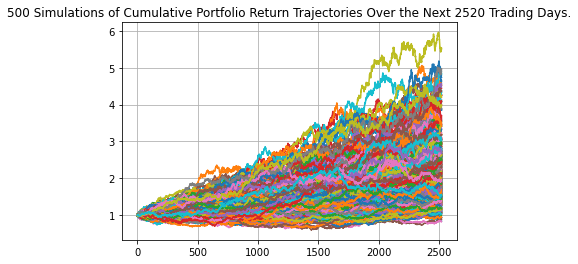

In [272]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

line_plot.grid()

line_plot.get_figure().savefig('MC_tenyear_sim_plot.png',bbox_inches='tight')

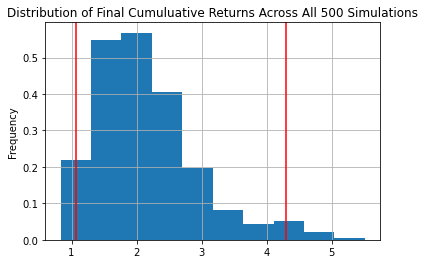

In [273]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()
dist_plot.grid()
dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [274]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary10 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(mc_summary10)

count           500.000000
mean              2.149114
std               0.786838
min               0.830343
25%               1.602150
50%               2.033595
75%               2.525743
max               5.513238
95% CI Lower      1.062961
95% CI Upper      4.296297
Name: 2520, dtype: float64


In [275]:
# Set initial investment
initial_investment10 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mc_summary10[8]*initial_investment10,2)
ci_upper_ten = round(mc_summary10[9]*initial_investment10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $21259.23 and $85925.95
